House price estimation multiple linear regression ( Code is heavily inspired by book TensorFlow 1.x Deep Learning Cookbook )


In [54]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


def normalize(X):
    '''
    Normalizes the array
    '''
    mean = np.mean(X)
    std = np.std(X)
    X = (X - mean)/std
    return X

def append_bias_reshape(features, labels):
    '''
    adds bias to weights
    '''
    m = features.shape[0]
    n = features.shape[1]
    x = np.reshape(np.c_[np.ones(m), features], [m,n + 1])
    y = np.reshape(labels, [m,1])
    return x, y

def get_boston_data():
    '''
    download and return normalized boston data with bias added
    '''
    boston = tf.contrib.learn.datasets.load_dataset('boston')
    X_train, Y_train = boston.data, boston.target
    X_train = normalize(X_train)
    X_train, Y_train = append_bias_reshape(X_train, Y_train)
    m = len(X_train)
    n = X_train.shape[1]
    print('m:{} ,n:{}'.format(m,n))
    return X_train, Y_train


class LinearRegressionModel():
    '''
    Multivariate linear regression model
    '''
    
    def __init__(self, learning_rate = 0.01, shape = (506, 14)):
        self.learning_rate = learning_rate
        self.shape = shape
        self.X = tf.placeholder(tf.float32, name = 'X')
        self.Y = tf.placeholder(tf.float32, name = 'Y')
        self.w = tf.Variable(tf.random_normal([self.shape[1],1]))
        self.Y_hat = tf.matmul(self.X, self.w)
        self.loss = tf.reduce_mean(tf.square(self.Y - self.Y_hat, name = 'loss'))
        self.optimizer = tf.train.GradientDescentOptimizer(self.learning_rate).minimize(self.loss)
        self.init_op = tf.global_variables_initializer()
        self.sess = tf.Session()
        
    def fit(self, X, Y, epochs = 100, every = 10):
        '''
        optimizes weights
        args:
          X: <numpy.array>, features 
          Y: <numpy.array>, labels
          epochs: <int>, number of epochs
          every: <int>, how often print message with Epoch and Loss values
        '''
        total = []
        self.sess.run(self.init_op)
        for i in range(epochs):
            _, l = self.sess.run([self.optimizer, self.loss], feed_dict = {self.X: X, self.Y: Y})
            total.append(l)
            if i % every == 0:
                print('Epoch {} Loss: {}'.format(i, l))
        weights = self.sess.run(self.w)
        return total, weights
    
    def predict(self, X, before_fit = False):
        '''
        return predicted values, 
        
        args:
          X: <numpy.array>, features
          before_fit: <boolean>, change to True if you want to use before calling fit method
        '''
        if before_fit:
            self.sess.run(self.init_op)
        Y_hat = self.sess.run(self.Y_hat, feed_dict = {self.X: X})
        return Y_hat
    
    def show(self, values):
        '''
        plot graph
        
        args:
          values: <list>, list or array of values to be plotted
        '''
        plt.plot(values)
        plt.show()
    
    def close_session(self):
        '''
        closes tensorflow session
        '''
        self.sess.close()
        return True
    
    def close_and_reset(self):
        '''
        closes tensorflow session, clears the default graph stack and resets the global default graph.
        '''
        self.sess.close()
        tf.reset_default_graph()
        return True

m:506 ,n:14
Epoch 0 Loss: 271.436767578125
Epoch 1000 Loss: 58.750343322753906
Epoch 2000 Loss: 56.36000442504883
Epoch 3000 Loss: 54.917991638183594
Epoch 4000 Loss: 53.72114944458008
Epoch 5000 Loss: 52.64610290527344
Epoch 6000 Loss: 51.653682708740234
Epoch 7000 Loss: 50.72605895996094
Epoch 8000 Loss: 49.852970123291016
Epoch 9000 Loss: 49.027618408203125


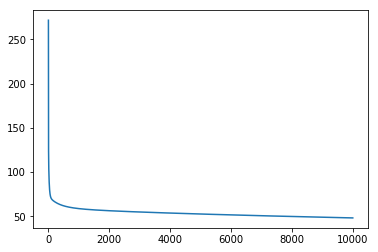

In [61]:
X_train, Y_train = get_boston_data()
lr = LinearRegressionModel()
predicted_before = lr.predict(X_train, True)
losses, weights= lr.fit(X_train, Y_train, 10000, 1000)
predicted_after = lr.predict(X_train)
lr.close_and_reset()
lr.show(losses)

In [65]:
for x,y,z in zip(Y_train[:10], predicted_before[:10], predicted_after[:10]):
    print(x, y, z)

[24.] [1.0676947] [27.162415]
[21.6] [0.41446906] [25.311047]
[34.7] [0.54760945] [26.458832]
[33.4] [0.46191895] [27.176754]
[36.2] [0.40124887] [26.654613]
[28.7] [0.3247584] [26.619003]
[22.9] [1.399284] [24.739468]
[27.1] [1.1223514] [23.179821]
[16.5] [1.1401207] [20.702637]
[18.9] [1.1591593] [23.526329]
